Many segmentation algorithms rely on the existence of clear edges. But what happens when there are no clear edges? Can segmentation still be performed? You perhaps can attenpt a segmentation by performing some smoothing first, but these aren't guaranteed to be successful. Take the following image, for instance:

In [133]:
import numpy as np
from skimage.segmentation import chan_vese
from skimage.morphology import disk, binary_closing, binary_opening
from skimage.filters import rank
from skimage.data import camera
import matplotlib.pyplot as plt
from skimage.util import img_as_float
from scipy.ndimage.morphology import binary_fill_holes

In [73]:
#im = plt.imread('https://i.stack.imgur.com/xHJHC.png')
#im = camera()
im = plt.imread('https://www.researchgate.net/profile/Peter_Bankhead/publication/260261544/figure/fig30/AS:669432326135812@1536616512124/A-demonstration-that-Poisson-noise-changes-throughout-an-image-a-Part-of-a-spinning.ppm')

(-0.5, 511.5, 511.5, -0.5)

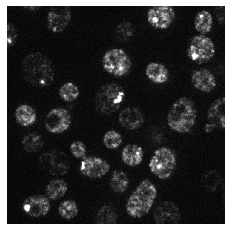

In [76]:
im = im[:, :, 0]
plt.imshow(im, cmap='gray')
plt.axis('off')

In [77]:
im.shape

(512, 512)

In [119]:
# cv = chan_vese(im, mu=0.25, lambda1=1.0, lambda2=1.5, tol=1e-3, max_iter=250, dt=0.5,
#                init_level_set='checkerboard', extended_output=True)
cv = chan_vese(im, mu=0.2, lambda1=1.0, lambda2=1.0, tol=5e-4, max_iter=4000, dt=0.5,
               init_level_set='checkerboard', extended_output=True)

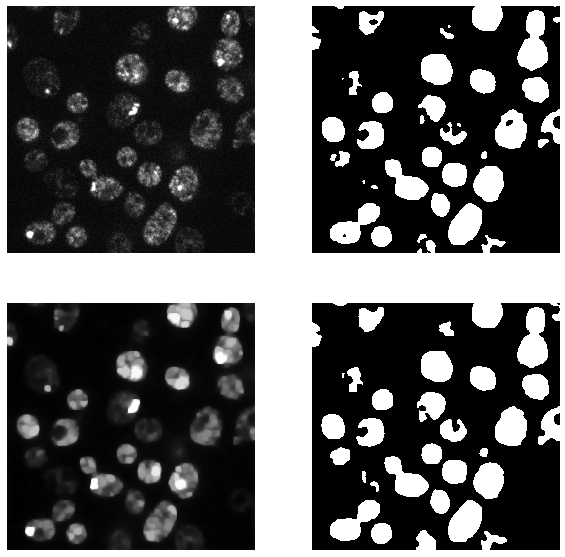

In [144]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()
titles = ['Original Image', 'Chan-Vese Segmentation', 'Final Level Set', 'Evolution of Energy']
C = binary_fill_holes(np.abs(cv[1]) < 0.01)

axes[0].imshow(im, cmap='gray')
axes[1].imshow(cv[0], cmap='gray')
axes[2].imshow(cv[1], cmap='gray')
axes[3].imshow(cv[0] | C, cmap='gray')
#axes[3].plot(cv[2])
#axes[3].imshow(img_as_float(im) - cv[1], cmap='gray')

for i, ax in enumerate(axes):
    ax.axis('off')